In [111]:
def plotData(datas):
    fig = plt.figure(figsize=(15, 15))
    null = plt.grid(linestyle='--', linewidth=0.5)
    null = plt.xticks(np.arange(0,VaMAX,20))
    null = plt.yticks(np.arange(0,IaMAX,0.002))
    null = plt.xlim([0,VaMAX])
    null = plt.ylim([0,IaMAX])
    
    for data in datas:
        colnames = data.columns.values
        colcount = len(colnames)
        rowcount = len(data[colnames[0]])
        null = [plt.plot(data['PlateVoltage'],data[colnames[x]],label=colnames[x],color='black') for x in range(1,colcount)]

In [121]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy import interpolate
import math
from ipywidgets import *

def firstQuad(data):
    colnames = data.columns.values
    colcount = len(colnames)
    rowcount = len(data[colnames[0]])

    # do a little clean up
    # remove negative values of plate current
    for i in range(1,colcount):
        for j in range(rowcount):
            if data[colnames[i]][j] < 0.00:
                data[colnames[i]][j] = 0.0
    return data

                
# used engauge to extract plot data from datasheet
triodefn = "6au6 plate characteristic - triode.csv"
platefn  = "6au6 plate characteristic - pentode.csv"
screenfn = "6au6 screen characteristic - pentode.csv"

triodeData = firstQuad(pd.read_csv(triodefn))
plateData = firstQuad(pd.read_csv(platefn))
screenData = firstQuad(pd.read_csv(screenfn))

VaMAX = 300.0
IaMAX = 0.02

def powerDissipationData(powerDiss):
    data = []
    for v in range(5,int(VaMAX+5),5):
        data.append((v,powerDiss/v))
    return pd.DataFrame(data = data, columns = ['PlateVoltage','Current'])


def loadLineData(Va,Rp):
    data = []
    b = Va/Rp
    m = -1/Rp
    for v in range(0,int(Va+5),5):
        data.append((v,m*v+b))
    return pd.DataFrame(data = data, columns = ['PlateVoltage','Current'])

powerDissData = powerDissipationData(3.5)
loadLineData = loadLineData(250.0,18000)

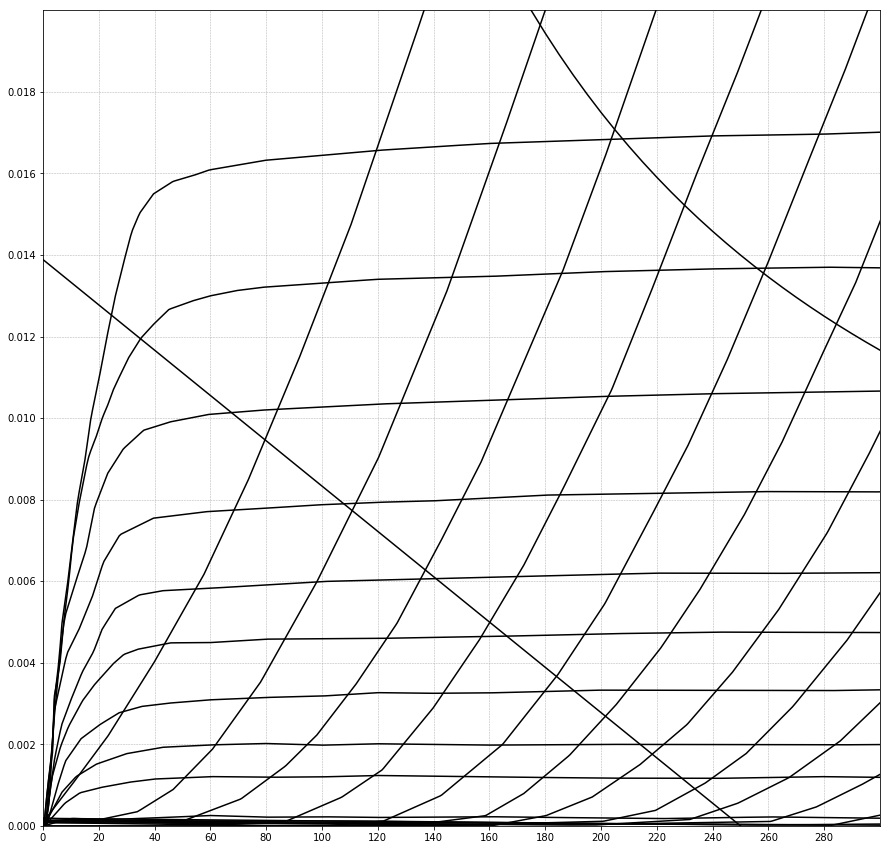

In [122]:
plotData([triodeData,plateData,powerDissData,loadLineData])